In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
path= 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Demand forecasting-POC\\Sample\\Dataset\\'


data= pd.read_excel(path + 'item_and_store_details.xlsx', sheet_name = 'item_and_store_details')

In [3]:
data

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [4]:
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
data.shape

(913000, 4)

In [6]:
data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [7]:
len(data.store.unique())    #Total number of stores 

10

In [8]:
len(data.item.unique())   # Total number of items.

50

__Selecting top 10 selling items__ 

In [9]:
data_filter = data[data['item'].isin([8,13,15,18,22,25,28,36,38,45])]

In [10]:
data_filter

,date,store,item,sales
127820,2013-01-01,1,8,33
127821,2013-01-02,1,8,37
127822,2013-01-03,1,8,38
127823,2013-01-04,1,8,54
127824,2013-01-05,1,8,51
...,...,...,...,...
821695,2017-12-27,10,45,64
821696,2017-12-28,10,45,79
821697,2017-12-29,10,45,72
821698,2017-12-30,10,45,76


In [11]:
data_filter.head(10)

,date,store,item,sales
127820,2013-01-01,1,8,33
127821,2013-01-02,1,8,37
127822,2013-01-03,1,8,38
127823,2013-01-04,1,8,54
127824,2013-01-05,1,8,51
127825,2013-01-06,1,8,60
127826,2013-01-07,1,8,28
127827,2013-01-08,1,8,34
127828,2013-01-09,1,8,40
127829,2013-01-10,1,8,43


In [12]:
data_filter.tail(10)

,date,store,item,sales
821690,2017-12-22,10,45,81
821691,2017-12-23,10,45,77
821692,2017-12-24,10,45,93
821693,2017-12-25,10,45,65
821694,2017-12-26,10,45,87
821695,2017-12-27,10,45,64
821696,2017-12-28,10,45,79
821697,2017-12-29,10,45,72
821698,2017-12-30,10,45,76
821699,2017-12-31,10,45,89


In [13]:
data_filter.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
data_filter['store'] = data_filter['store'].replace([1,2,3,4,5,6,7,8,9,10],['St1', 'St2','St3','St4',\
                                                                           'St5', 'St6', 'St7', 'St8',\
                                                                           'St9', 'St10'])

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_17728\831078164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['store'] = data_filter['store'].replace([1,2,3,4,5,6,7,8,9,10],['St1', 'St2','St3','St4',\


In [15]:
data_filter.head()

,date,store,item,sales
127820,2013-01-01,St1,8,33
127821,2013-01-02,St1,8,37
127822,2013-01-03,St1,8,38
127823,2013-01-04,St1,8,54
127824,2013-01-05,St1,8,51


In [16]:
data_filter.tail()

,date,store,item,sales
821695,2017-12-27,St10,45,64
821696,2017-12-28,St10,45,79
821697,2017-12-29,St10,45,72
821698,2017-12-30,St10,45,76
821699,2017-12-31,St10,45,89


In [17]:
data_filter.item

127820     8
127821     8
127822     8
127823     8
127824     8
          ..
821695    45
821696    45
821697    45
821698    45
821699    45
Name: item, Length: 182600, dtype: int64

In [18]:
data_filter['item'] = data_filter['item'].replace([8,13,15,18,22,25,28,36,38,45],["Lay's", 'Kurkure','Bingo','Haldiram',\
                                                                           'Peanuts', 'Banana Chips', 'Too Yum', 'Parle-G',\
                                                                           'Fruit Cake', 'Wafers'])

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_17728\1329963114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['item'] = data_filter['item'].replace([8,13,15,18,22,25,28,36,38,45],["Lay's", 'Kurkure','Bingo','Haldiram',\


In [19]:
data_filter

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
821695,2017-12-27,St10,Wafers,64
821696,2017-12-28,St10,Wafers,79
821697,2017-12-29,St10,Wafers,72
821698,2017-12-30,St10,Wafers,76


# Checking Stationarity
### Adfuller Test

In [20]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_filter['sales'], autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])

1. ADF :  -26.55760674463949
2. P-Value :  0.0


Null hypothesis: Time series is non-stationary.

Alternative hypothesis: Time series is stationary.

As p value is p<0.05 we reject the null hypothesis and accept the alternative hypothesis. 

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [21]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data_filter['sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.350986
p-value: 0.098282


Null hypothesis: Time series is stationary.

Alternative hypothesis: Time series is non-stationary.

As p value is p>0.05 we accept the null hypothesis and reject the alternative hypothesis. 

In [ ]:
# data_filter.to_excel('Retail_sales_dt.xlsx', index=False)

# Time Series Decomposition

In [20]:
data_filter.date.max(), data_filter.date.min()

(Timestamp('2017-12-31 00:00:00'), Timestamp('2013-01-01 00:00:00'))

In [21]:
import copy
data_df= copy.deepcopy(data_filter)

In [22]:
data_df.set_index('date')

,store,item,sales
date,,,
2013-01-01,St1,Lay's,33
2013-01-02,St1,Lay's,37
2013-01-03,St1,Lay's,38
2013-01-04,St1,Lay's,54
2013-01-05,St1,Lay's,51
...,...,...,...
2017-12-27,St10,Wafers,64
2017-12-28,St10,Wafers,79
2017-12-29,St10,Wafers,72


In [ ]:
data_df2 = data_df[(data_df['store']== 'St1') & (data_df['item']== "Lay's")]

#### Multiplicative

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(data_df2['sales'], model='multiplicable', period=365, extrapolate_trend= 'freq')

In [ ]:
result.plot()

#### Additive

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result1 =seasonal_decompose(data_df2['sales'], model='additive', period=int(365.25), extrapolate_trend= 'freq')

In [ ]:
result1.plot()

In [ ]:
data_df.head()

In [ ]:
data_df.tail()

### All in One

In [ ]:
for i in data_df['store'].unique():
#     print(i)
    df= data_df[data_df['store']==i]
    for j in df['item'].unique():
#         print(i, ":- ", j)
        item_data = df[df['item']==j]
#         print(item_data)
        
        item_data= item_data.drop(['store', 'item'], axis=1)
        item_data.set_index('date')
#         print(item_data)
        time_series = item_data.index  #Get dates for test data
        
        result=seasonal_decompose(item_data['sales'], model='Additive', period=int(365.25), extrapolate_trend= 'freq')
        
        #Results
        se_out= pd.DataFrame()
        se_out['Trend'] = result.trend
        se_out['seasonality']  = result.seasonal
        se_out['remainder']  = result.resid
#         se_out['Date']= train_dates.values
        df_out = pd.concat([item_data,se_out], axis=1 )
    
        
        #Saving Results 
        df_out['Store']= i
        df_out['Item']=j
        
        predction_output = "Seasonality\season_" +i+"-"+j+".xlsx"
        df_out.to_excel(predction_output, index= False)
        
#         print(df_out)

In [ ]:
import pandas as pd
import os
import glob

In [ ]:
path = 'C:\\Users\\Ramshankar\\OneDrive - iLink Systems Inc\\Documents\\Demand forecasting-POC\\Notebooks\\Seasonality'
out_files = glob.glob(os.path.join(path, "*.xlsx"))
   
dfs= []


for f in out_files:
    dfs.append(pd.read_excel(f))
df_season=pd.concat(dfs, ignore_index=True)

In [ ]:
df_season

In [ ]:
# df_season.to_excel('Seasonality_Additive_all.xlsx', index=False)

### Modelling 

In [20]:
import copy
data_df= copy.deepcopy(data_filter)

In [21]:
data_df2 = data_df[(data_df['store']== 'St1') & (data_df['item']== "Lay's")]

In [22]:
data_df2

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
129641,2017-12-27,St1,Lay's,58
129642,2017-12-28,St1,Lay's,49
129643,2017-12-29,St1,Lay's,54
129644,2017-12-30,St1,Lay's,75


In [25]:
data_df2= data_df2.set_index('date')

In [26]:
data_df2

,store,item,sales
date,,,
2013-01-01,St1,Lay's,33
2013-01-02,St1,Lay's,37
2013-01-03,St1,Lay's,38
2013-01-04,St1,Lay's,54
2013-01-05,St1,Lay's,51
...,...,...,...
2017-12-27,St1,Lay's,58
2017-12-28,St1,Lay's,49
2017-12-29,St1,Lay's,54


In [27]:
# # Import the library
# from pmdarima import auto_arima
  
# # Ignore harmless warnings
# import warnings
# warnings.filterwarnings("ignore")

In [28]:
# # Fit auto_arima function to df dataset

# stepwise_fit = auto_arima(data_df2['sales'], start_p = 1, start_q = 1,
#                           max_p = 3, max_q = 3, m = 12,
#                           start_P = 0, seasonal = True,
#                           d = None, D = 1, trace = True,
#                           error_action ='ignore',   # we don't want to know if an order does not work
#                           suppress_warnings = True,  # we don't want convergence warnings
#                           stepwise = True)           # set to stepwise
  
# # To print the summary
# stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=11.80 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=15799.873, Time=0.21 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=15372.020, Time=2.13 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=15076.888, Time=2.99 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=15797.966, Time=0.14 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=15701.909, Time=0.89 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=8.80 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=15067.934, Time=5.86 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=15051.119, Time=12.92 sec
 ARIMA(0,0,1)(2,1,2)[12] intercept   : AIC=inf, Time=22.01 sec
 ARIMA(0,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=18.18 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=15174.450, Time=7.49 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=25.49 sec
 ARIMA(0,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=25.00 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1826
Model:             SARIMAX(0, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -7520.364
Date:                                 Mon, 26 Jun 2023   AIC                          15050.727
Time:                                         16:26:38   BIC                          15078.244
Sample:                                     01-01-2013   HQIC                         15060.881
                                          - 12-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2455      0.024     10.166      0.000       0.198       0.293
ar.S.L12      -0.7865      0.061    -12.863      0.000      -0.906      -0.667
ma.S.L12       0.1531      0.057      2.708      0.007       0.042       0.264
ma.S.L24      -0.6216      0.034    -18.163      0.000      -0.689      -0.554
sigma2       232.5088      8.331     27.908      0.000     216.180     248.837
===================================================================================
Ljung-Box (L1) (Q):                   2.76   Jarque-Bera (JB):                 6.86
Prob(Q):                              0.10   Prob(JB):                         0.03
Heteroskedasticity (H):               1.34   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA Model

In [162]:
data_df2= data_df2.set_index('date')

In [163]:
from statsmodels.tsa.arima.model import ARIMA


In [164]:
len(data_df2)

1826

In [165]:
1826*0.8

1460.8000000000002

In [166]:
# Split data into train / test sets
train = data_df2.iloc[:len(data_df2)-366]
test = data_df2.iloc[len(data_df2)-366:]

In [167]:
len(train)

1460

In [168]:
len(test)

366

In [169]:
model = ARIMA(train['sales'], 
                order = (2, 1, 0))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1460
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -5966.481
Date:                Mon, 26 Jun 2023   AIC                          11938.962
Time:                        17:28:22   BIC                          11954.819
Sample:                    01-01-2013   HQIC                         11944.878
                         - 12-30-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5229      0.028    -18.788      0.000      -0.577      -0.468
ar.L2         -0.2071      0.029     -7.075      0.000      -0.265      -0.150
sigma2       208.6726      7.331     28.466      0.000     194.305     223.040
===================================================================================
Ljung-Box (L1) (Q):                   2.45   Jarque-Bera (JB):               109.32
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               1.32   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='date'>

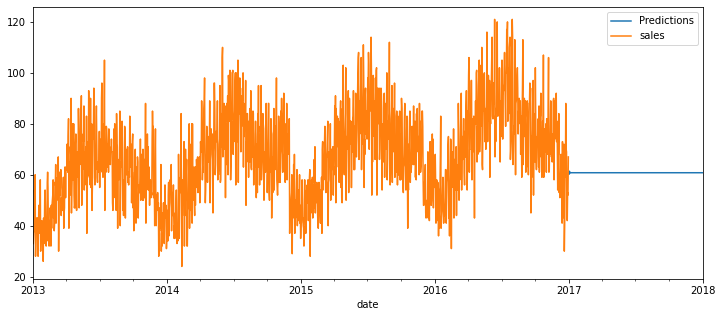

In [170]:
start = 1
end1 = len(train) + len(test)

  
# Predictions for one-year against the test set
predictions = result.predict(start=1461, end= 1826,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
train['sales'].plot(figsize = (12, 5), legend = True)
# test['sales'].plot(figsize = (12, 5), legend = True)

In [171]:
predictions

2017-01-01    60.249473
2017-01-02    61.368315
2017-01-03    60.599921
2017-01-04    60.769923
2017-01-05    60.840206
                ...    
2017-12-28    60.790193
2017-12-29    60.790193
2017-12-30    60.790193
2017-12-31    60.790193
2018-01-01    60.790193
Freq: D, Name: Predictions, Length: 366, dtype: float64

In [172]:
## Importing liberaries 

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import math 


In [173]:
#MSE

mean_squared_error(test['sales'], predictions.values)

691.4008119588817

In [174]:
#RMSE

math.sqrt(mean_squared_error(test['sales'], predictions.values))

26.29450155372567

In [175]:
#MAPE
MAPE_Score= mean_absolute_percentage_error(test['sales'], predictions.values).round(2)
print('MAPE_Score:', MAPE_Score)



MAPE_Score: 0.25


### Sarima Model 

In [177]:
# data_df2= data_df2.set_index('date')

# Split data into train / test sets
train = data_df2.iloc[:len(data_df2)-366]
test = data_df2.iloc[len(data_df2)-366:]

In [178]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [179]:
# Train the model on the full dataset
model_sr = SARIMAX(train['sales'], 
                        order = (0, 1, 2), 
                        seasonal_order =(1, 1, 2, 12))
result_sr = model_sr.fit()
#   ARIMA(0,0,1)(1,1,2)[12]  

<AxesSubplot:xlabel='date'>

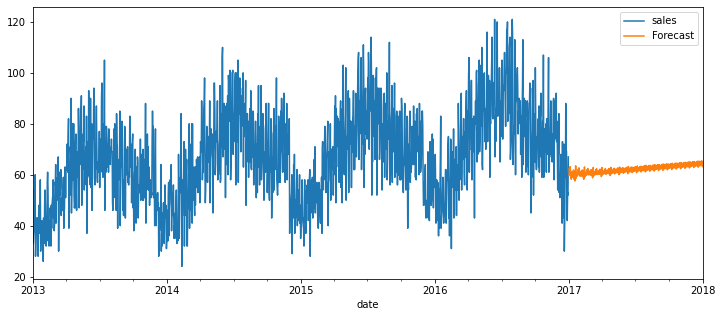

In [188]:
# Forecast for the next 3 years
forecast_sr = result_sr.predict(start = (len(train)+1), 
                          end = (len(data_df2)), 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
train['sales'].plot(figsize = (12, 5), legend = True)
forecast_sr.plot(legend = True)

In [189]:
#MSE

mean_squared_error(test['sales'], forecast_sr.values)

634.1646691048553

In [190]:
#RMSE

math.sqrt(mean_squared_error(test['sales'], forecast_sr.values))

25.182626334535787

In [191]:
#MAPE
MAPE_Score= mean_absolute_percentage_error(test['sales'], forecast_sr.values).round(2)
print('MAPE_Score:', MAPE_Score)



MAPE_Score: 0.24


### Holt Winter Model 

In [ ]:
# data_df2= data_df2.set_index('date')

# Split data into train / test sets
train = data_df2.iloc[:len(data_df2)-366]
test = data_df2.iloc[len(data_df2)-366:]

In [192]:
data_df2

,store,item,sales
date,,,
2013-01-01,St1,Lay's,33
2013-01-02,St1,Lay's,37
2013-01-03,St1,Lay's,38
2013-01-04,St1,Lay's,54
2013-01-05,St1,Lay's,51
...,...,...,...
2017-12-27,St1,Lay's,58
2017-12-28,St1,Lay's,49
2017-12-29,St1,Lay's,54


In [193]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [194]:
# Split data into train / test sets
train = data_df2.iloc[:len(data_df2)-366]
test = data_df2.iloc[len(data_df2)-366:]

start = 1
end1 = len(train) + len(test)


In [195]:
model_holt_winters = ExponentialSmoothing(train['sales'], seasonal_periods=12, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.




In [196]:
y_pred1 = model_holt_winters.forecast(len(test))# Predict the test data
# y_pred1 = pd.DataFrame(y_pred1,index = test.index,columns=['holt_winters_Pred'])

In [197]:
# test.index

In [198]:
# train.index

In [199]:
# y_pred1.index

In [200]:
# y_pred1.values

In [201]:
# df= pd.DataFrame()
# df['date']= y_pred1.index
# df['Pred']=y_pred1.values

In [202]:
# df

In [203]:
#MSE

mean_squared_error(test['sales'], y_pred1.values)

2333.574142404187

In [204]:
#RMSE

math.sqrt(mean_squared_error(test['sales'], y_pred1.values))

48.30708170034894

In [205]:
#MAPE
MAPE_Score= mean_absolute_percentage_error(test['sales'], y_pred1.values).round(2)
print('MAPE_Score:', MAPE_Score)



MAPE_Score: 0.51


## Facebook Probhet Model 

In [ ]:
# data_df2= data_df2.set_index('date')

# Split data into train / test sets
# train = data_df2.iloc[:len(data_df2)-366]
# test = data_df2.iloc[len(data_df2)-366:]

In [33]:
data_filter

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
821695,2017-12-27,St10,Wafers,64
821696,2017-12-28,St10,Wafers,79
821697,2017-12-29,St10,Wafers,72
821698,2017-12-30,St10,Wafers,76


In [24]:
import copy
data_df= copy.deepcopy(data_filter)

In [34]:
data_df

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
821695,2017-12-27,St10,Wafers,64
821696,2017-12-28,St10,Wafers,79
821697,2017-12-29,St10,Wafers,72
821698,2017-12-30,St10,Wafers,76


In [36]:
data_df2 = data_df[(data_df['store']== 'St1') & (data_df['item']== "Lay's")]
data_df2

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
129641,2017-12-27,St1,Lay's,58
129642,2017-12-28,St1,Lay's,49
129643,2017-12-29,St1,Lay's,54
129644,2017-12-30,St1,Lay's,75


In [26]:
# data_df2.reset_index(inplace= True)

In [61]:
# Split data into train / test sets
train = data_df2.iloc[:len(data_df2)-366]
test = data_df2.iloc[len(data_df2)-366:]

In [62]:
train

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
129275,2016-12-26,St1,Lay's,47
129276,2016-12-27,St1,Lay's,42
129277,2016-12-28,St1,Lay's,53
129278,2016-12-29,St1,Lay's,52


In [63]:
train.drop(['store', 'item'], axis=1, inplace=True)

C:\Users\Ramshankar\AppData\Local\Temp\ipykernel_7748\3383891889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['store', 'item'], axis=1, inplace=True)


In [64]:
train

,date,sales
127820,2013-01-01,33
127821,2013-01-02,37
127822,2013-01-03,38
127823,2013-01-04,54
127824,2013-01-05,51
...,...,...
129275,2016-12-26,47
129276,2016-12-27,42
129277,2016-12-28,53
129278,2016-12-29,52


In [65]:
train= train.rename(columns= {'date': 'ds', 'sales': 'y'})

In [66]:
#importing liberaries 

from prophet import Prophet

In [67]:
model = Prophet()
model.fit(train)

21:07:20 - cmdstanpy - INFO - Chain [1] start processing
21:07:21 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
# test1= test.drop(['sales', 'store', 'item'], axis=1)
# test1= test1.rename(columns= {'date': 'ds'})
# test1.head()

data_df3= data_df2.drop(['store', 'item', 'sales'], axis=1)
data_df3= data_df3.rename(columns= {'date': 'ds'})
data_df3

,ds
127820,2013-01-01
127821,2013-01-02
127822,2013-01-03
127823,2013-01-04
127824,2013-01-05
...,...
129641,2017-12-27
129642,2017-12-28
129643,2017-12-29
129644,2017-12-30


In [69]:
forecasted = model.predict(data_df3)

In [70]:
forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,55.032615,21.718394,44.338909,55.032615,55.032615,-21.979282,-21.979282,-21.979282,-4.369953,-4.369953,-4.369953,-17.609329,-17.609329,-17.609329,0.0,0.0,0.0,33.053333
1,2013-01-02,55.050807,22.088100,44.037067,55.050807,55.050807,-22.471265,-22.471265,-22.471265,-4.969766,-4.969766,-4.969766,-17.501499,-17.501499,-17.501499,0.0,0.0,0.0,32.579542
2,2013-01-03,55.068998,25.724209,47.816733,55.068998,55.068998,-18.636446,-18.636446,-18.636446,-1.215501,-1.215501,-1.215501,-17.420945,-17.420945,-17.420945,0.0,0.0,0.0,36.432553
3,2013-01-04,55.087190,29.739387,53.097246,55.087190,55.087190,-13.738091,-13.738091,-13.738091,3.629724,3.629724,3.629724,-17.367814,-17.367814,-17.367814,0.0,0.0,0.0,41.349099
4,2013-01-05,55.105381,34.259591,57.017871,55.105381,55.105381,-8.996812,-8.996812,-8.996812,8.344633,8.344633,8.344633,-17.341445,-17.341445,-17.341445,0.0,0.0,0.0,46.108570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2017-12-27,83.732055,48.830750,71.649552,83.270459,84.176395,-23.515590,-23.515590,-23.515590,-4.969766,-4.969766,-4.969766,-18.545824,-18.545824,-18.545824,0.0,0.0,0.0,60.216465
1822,2017-12-28,83.747530,53.286397,75.435269,83.284255,84.194201,-19.547334,-19.547334,-19.547334,-1.215501,-1.215501,-1.215501,-18.331833,-18.331833,-18.331833,0.0,0.0,0.0,64.200196
1823,2017-12-29,83.763005,58.550165,80.510005,83.298269,84.211975,-14.500276,-14.500276,-14.500276,3.629724,3.629724,3.629724,-18.130000,-18.130000,-18.130000,0.0,0.0,0.0,69.262729
1824,2017-12-30,83.778480,63.679736,84.578856,83.312284,84.230341,-9.600415,-9.600415,-9.600415,8.344633,8.344633,8.344633,-17.945048,-17.945048,-17.945048,0.0,0.0,0.0,74.178065


In [71]:
forecasted_df= forecasted[['ds', 'yhat']]
forecasted_df

,ds,yhat
0,2013-01-01,33.053333
1,2013-01-02,32.579542
2,2013-01-03,36.432553
3,2013-01-04,41.349099
4,2013-01-05,46.108570
...,...,...
1821,2017-12-27,60.216465
1822,2017-12-28,64.200196
1823,2017-12-29,69.262729
1824,2017-12-30,74.178065


In [72]:
data_df2

,date,store,item,sales
127820,2013-01-01,St1,Lay's,33
127821,2013-01-02,St1,Lay's,37
127822,2013-01-03,St1,Lay's,38
127823,2013-01-04,St1,Lay's,54
127824,2013-01-05,St1,Lay's,51
...,...,...,...,...
129641,2017-12-27,St1,Lay's,58
129642,2017-12-28,St1,Lay's,49
129643,2017-12-29,St1,Lay's,54
129644,2017-12-30,St1,Lay's,75


In [73]:
data4= data_df2.rename(columns= {'date':'ds', 'sales': 'y'})

In [76]:
data_merge= pd.merge(data4,forecasted_df, on= ['ds'], how ='inner' )

In [77]:
data_merge

,ds,store,item,y,yhat
0,2013-01-01,St1,Lay's,33,33.053333
1,2013-01-02,St1,Lay's,37,32.579542
2,2013-01-03,St1,Lay's,38,36.432553
3,2013-01-04,St1,Lay's,54,41.349099
4,2013-01-05,St1,Lay's,51,46.108570
...,...,...,...,...,...
1821,2017-12-27,St1,Lay's,58,60.216465
1822,2017-12-28,St1,Lay's,49,64.200196
1823,2017-12-29,St1,Lay's,54,69.262729
1824,2017-12-30,St1,Lay's,75,74.178065


In [57]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [58]:
mean_squared_error(data_merge.y, data_merge.yhat)

81.74753603073245

In [253]:
import math 

math.sqrt(mean_squared_error(data_merge.y, data_merge.yhat))

10.434237525932032

In [254]:
 from sklearn.metrics import mean_absolute_percentage_error

In [255]:
MAPE_Score= mean_absolute_percentage_error(data_merge.y, data_merge.yhat).round(2)
print('MAPE_Score:', MAPE_Score)

MAPE_Score: 0.12


<AxesSubplot:>

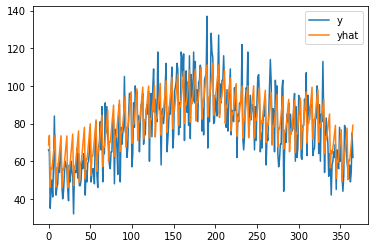

In [256]:
data_merge[['y', 'yhat']].plot()